<a href="https://colab.research.google.com/github/sanjayangadi8105/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Sanjay Angadi


# **Project Summary -**

The dataset is from an ongoing cardiovascular study on residents of the town of
Framingham, Massachusetts. The classification goal is to predict whether the
patient has a 10-year risk of future coronary heart disease (CHD). The dataset
provides the patients' information. It includes over 4,000 records and 15 attributes.
Each attribute is a potential risk factor. There are both demographic, behavioral,
and medical risk factors.

# **GitHub Link -**

https://github.com/sanjayangadi8105/Cardiovascular-Risk-Prediction

# **Problem Statement**


Cardiovascular diseases, including coronary heart disease (CHD), are a significant global health concern with potentially severe consequences. Early identification of individuals at risk for CHD is crucial for effective preventive measures and interventions. The aim of this project is to develop a predictive model that can accurately assess the 10-year risk of coronary heart disease based on a variety of demographic, lifestyle, and health-related attributes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


### Dataset Loading

In [90]:
# Load Dataset
df = pd.read_csv('/content/data_cardiovascular_risk.csv')

### Dataset First View

In [91]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

### What did you know about your dataset?

Identify columns with missing values.
Decide on a strategy to handle missing values: imputation, removal, or ignoring.
Impute missing values using methods like mean, median, mode, or more advanced techniques.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description

The df.describe() function provides a summary of the descriptive statistics for each numerical variable (column) in a DataFrame. It includes statistics like mean, standard deviation, minimum, maximum, quartiles, etc. Below is an explanation of what each statistic represents:

count: The number of non-missing values in the column.
mean: The average of all values in the column.
std: The standard deviation, which measures the spread of values around the mean.
min: The minimum value in the column.
25%: The first quartile (Q1), which is the value below which 25% of the data falls.
50%: The second quartile (Q2), also known as the median, which separates the data into two halves.
75%: The third quartile (Q3), which is the value below which 75% of the data falls.
max: The maximum value in the column.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 1 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2927 non-null   int64  
 1   age              2927 non-null   int64  
 2   education        2927 non-null   float64
 3   sex              2927 non-null   object 
 4   is_smoking       2927 non-null   object 
 5   cigsPerDay       2927 non-null   float64
 6   BPMeds           2927 non-null   float64
 7   prevalentStroke  2927 non-null   int64  
 8   prevalentHyp     2927 non-null   int64  
 9   diabetes         2927 non-null   int64  
 10  totChol          2927 non-null   float64
 11  sysBP            2927 non-null   float64
 12  diaBP            2927 non-null   float64
 13  BMI              2927 non-null   float64
 14  heartRate        2927 non-null   float64
 15  glucose          2927 non-null   float64
 16  TenYearCHD       2927 non-null   int64  
dtypes: float64(9),

In [ ]:
df.drop(['id'], axis=1).head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [ ]:
df.drop(['prevalentStroke'], axis=1).head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,4.0,M,NO,0.0,0.0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


In [ ]:
# age based on their sex
age_sex = df.groupby(['age'])['sex'].value_counts().unstack()
age_sex.head()

sex,F,M
age,,
32,1.0,NaN
33,2.0,2.0
34,9.0,4.0
35,14.0,10.0
36,30.0,38.0


In [ ]:
# Heart rate veary based on their sex
hear_rate_and_sex = df.groupby(['sex'])['heartRate'].mean()
hear_rate_and_sex

sex
F    77.182099
M    74.284621
Name: heartRate, dtype: float64

In [93]:
# smoking person based on their heart rate
def smoking_person(n):
  if n > 10 and n <= 60:
    return 'Lower heart rate'
  elif n > 60 and n <= 100:
    return 'Normal heart rate'
  elif n >= 100:
    return 'Heigher heart rate'


In [94]:
heart_condition = df['hear_rate_condition'] = df['heartRate'].apply(smoking_person)

In [95]:
heartrate_condition = df.groupby(['hear_rate_condition'])['heartRate'].agg(['median', 'min', 'max'])
heartrate_condition

,median,min,max
hear_rate_condition,,,
Heigher heart rate,110.0,102.0,143.0
Lower heart rate,60.0,45.0,60.0
Normal heart rate,75.0,61.0,100.0


In [40]:
smoking_persons = df.groupby(['totChol','sex'])['is_smoking'].value_counts().unstack()

In [41]:
smoking_persons.head()

,is_smoking,NO,YES
totChol,sex,,
107.0,1,1.0,NaN
113.0,2,NaN,1.0
119.0,2,NaN,1.0
124.0,2,1.0,NaN
126.0,2,1.0,NaN


### What all manipulations have you done and insights you found?

I can certainly guide you through various Analyzed the null values, drop the columns which are not required for our dataset, and from the dataset analyzed the different questions and answered based on the situation and analyzed the data manipulation techniques

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0, 0.5, 'Sex')

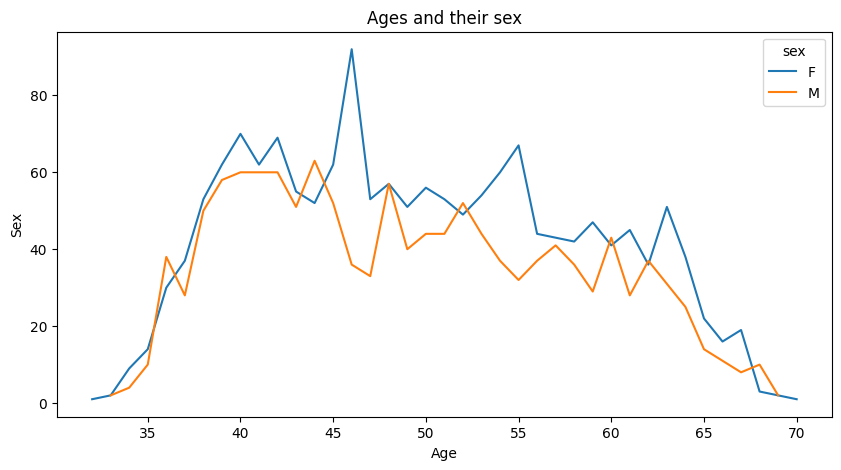

In [ ]:
# Chart - 1 visualization code
age_sex.plot(figsize=(10,5))
plt.title('Ages and their sex')
plt.xlabel('Age')
plt.ylabel('Sex')

##### 1. Why did you pick the specific chart?

 Positive impacts might arise if the business can tailor its products, services, or marketing strategies to better suit specific age and gender groups. For example, if you find that a particular age group of one gender is more prevalent, it could guide targeted advertising. Negative impacts could arise if the insights reveal demographic trends that the business cannot cater to effectively.

#### Chart - 2

Text(0, 0.5, 'Heart rate')

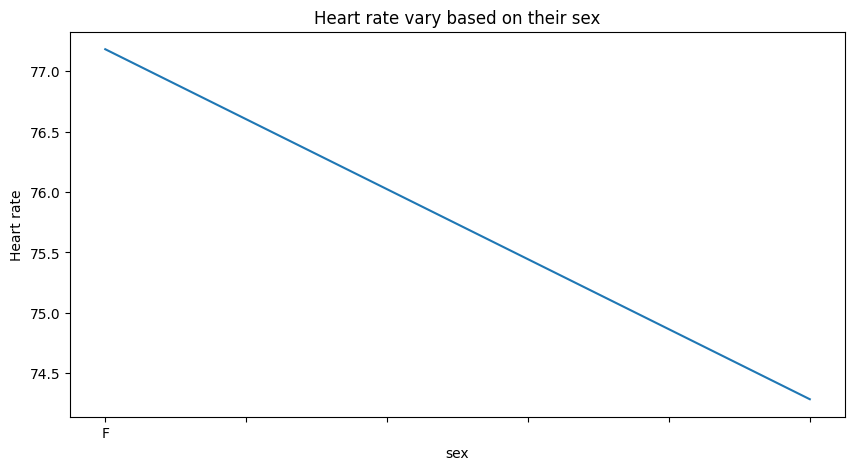

In [ ]:
# Chart - 2 visualization code
hear_rate_and_sex.plot(figsize=(10,5))
plt.title('Heart rate vary based on their sex')
plt.xlabel('sex')
plt.ylabel('Heart rate')

##### 1. Why did you pick the specific chart?

This type of chart can help quickly visualize any differences or patterns in heart rate between the two genders. It's suitable for comparing the central tendency (mean, median) of the heart rate variable for each sex and potentially identifying any notable disparities.

However, keep in mind that the choice of chart also depends on the data's characteristics and the specific insights you want to highlight. For instance, if you're interested in exploring the distribution of heart rate within each sex, a box plot or violin plot might be more appropriate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In summary, the insights could potentially have a positive impact on businesses related to health, fitness, medical services, and product development, leading to tailored and effective solutions. However, careful consideration is required to address privacy concerns, sample bias, and the accurate interpretation of the insights. It's crucial for the business to have a clear understanding of how these insights align with their goals, values, and the potential benefits and risks they pose.

#### Chart - 3

Text(0, 0.5, 'Heart_rate')

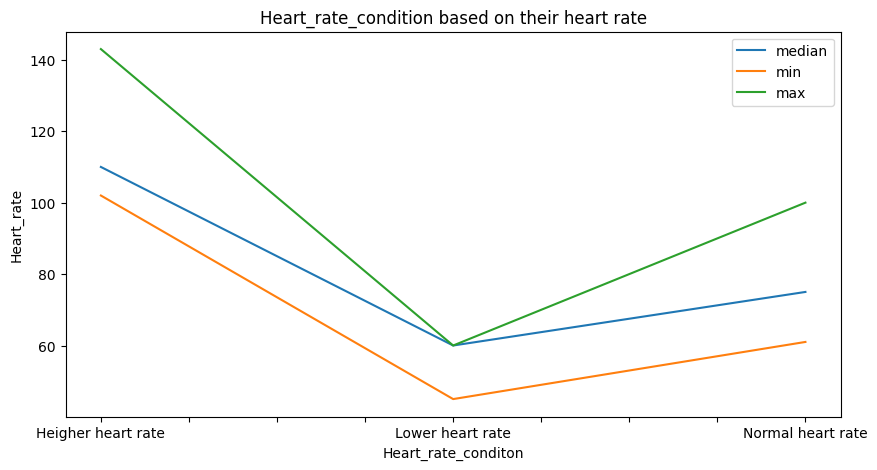

In [ ]:
# Chart - 3 visualization code
heartrate_condition.plot(figsize=(10,5))
plt.title('Heart_rate_condition based on their heart rate')
plt.xlabel('Heart_rate_conditon')
plt.ylabel('Heart_rate')

##### 1. Why did you pick the specific chart?

Heart Rate Abnormalities: It could potentially highlight if certain heart rate conditions are more common at extremely low or high heart rate values. This could indicate potential heart rate abnormalities or conditions that might require medical attention.

Heart Rate and Health: You might infer insights about how heart rate conditions correlate with heart rate values. For example, you might observe that high heart rate conditions are more common at higher heart rate values, suggesting a relationship between heart rate and overall health.

##### 2. What is/are the insight(s) found from the chart?

From the chart title and assuming that heartrate_condition is a categorical variable representing different heart rate conditions and Heart_rate is a continuous variable representing heart rate measurements, you might expect to see how heart rate conditions vary with different heart rate values.

#### Chart - 4

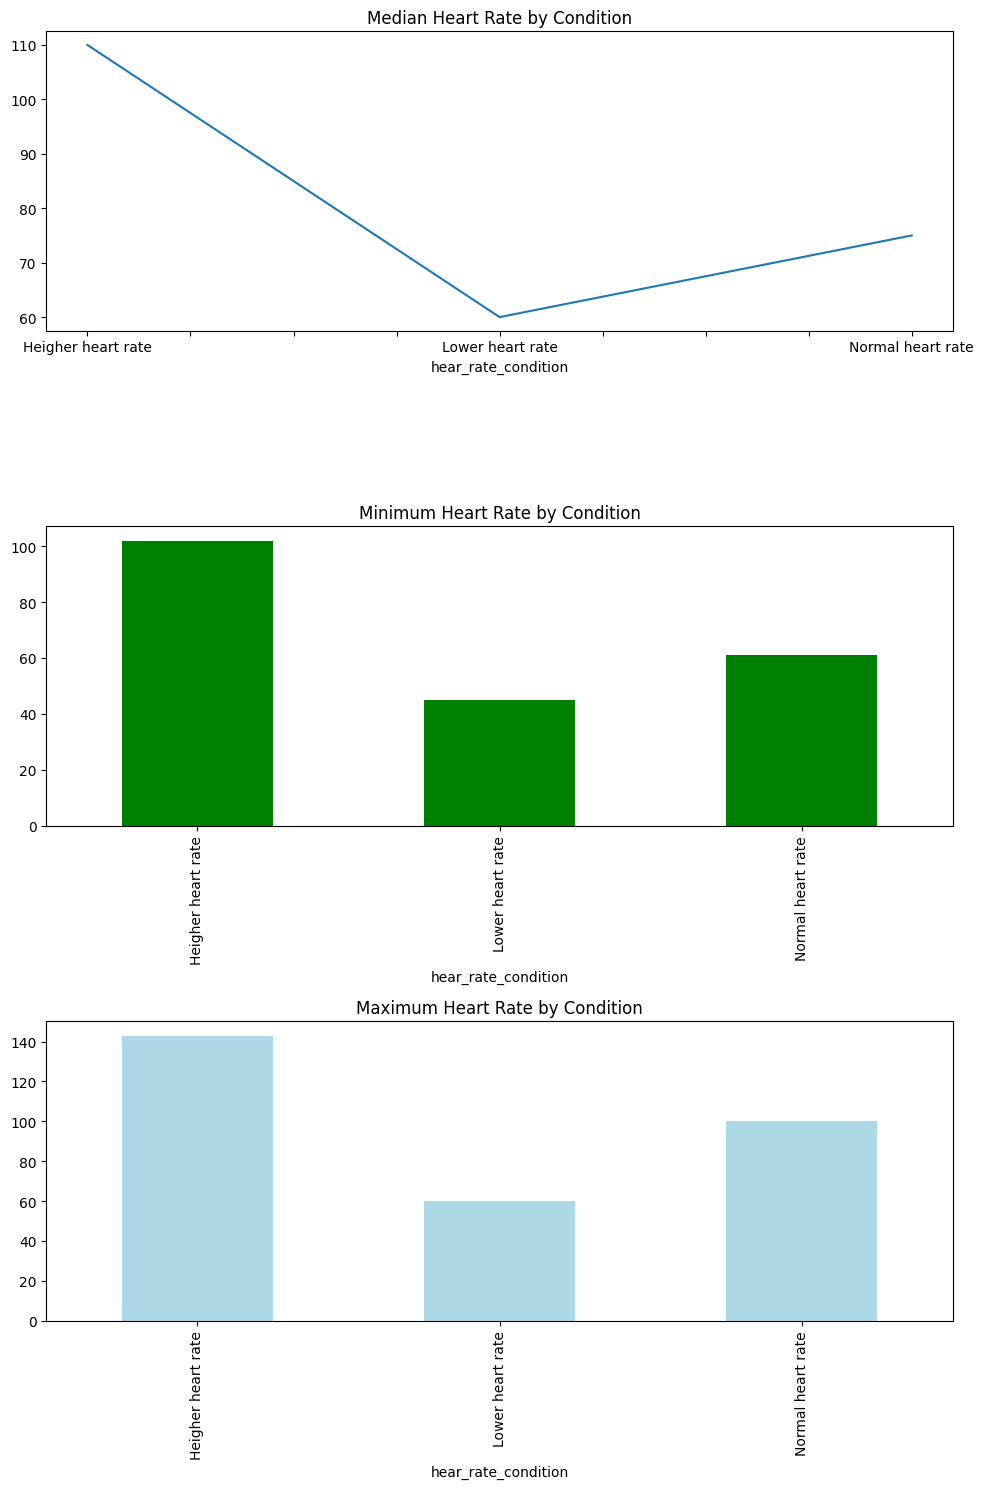

In [ ]:
# Chart - 4 visualization code
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
heartrate_condition['median'].plot(ax=axes[0])
axes[0].set_title('Median Heart Rate by Condition')


# Plot minimum heart rate
heartrate_condition['min'].plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Minimum Heart Rate by Condition')

# Plot maximum heart rate
heartrate_condition['max'].plot(kind='bar', ax=axes[2], color='lightblue')
axes[2].set_title('Maximum Heart Rate by Condition')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The choice of this specific chart likely aims to provide a comprehensive view of how heart rate values vary across different conditions using multiple summary statistics. It allows you to quickly compare central tendencies and ranges of heart rates in different conditions.

Chart 5

Text(0, 0.5, 'totChol')

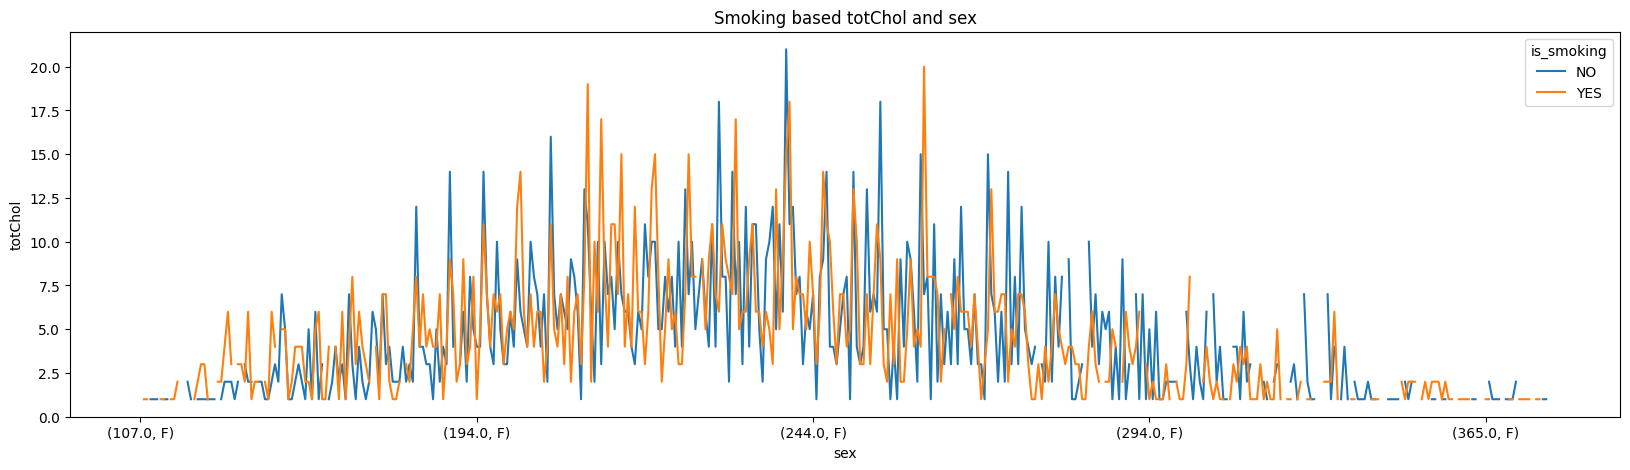

In [5]:
# Chart - 5 visualization code
smoking_persons.plot(figsize=(20,5))
plt.title('Smoking based totChol and sex')
plt.xlabel('sex')
plt.ylabel('totChol')

### Hypothetical Statement - 1

#### 1. Perform an appropriate statistical test.

In [ ]:
# Extract heart rate data for males and females
male_heart_rate = df[df['sex'] == 'M']['heartRate']
female_heart_rate = df[df['sex'] == 'F']['heartRate']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(male_heart_rate, female_heart_rate)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: -6.556314511738549
P-Value: 6.495822821567071e-11


##### Which statistical test have you done to obtain P-Value?

The t-test is a common statistical test used to determine if there's a significant difference between the means of two groups. It's often used when comparing the means of a continuous variable between two independent groups.

### Hypothetical Statement - 2

#### 1. Perform an appropriate statistical test.

In [ ]:
# Extract heart rate data for individuals with and without diabetes
heart_rate_diabetes = df[df['diabetes'] == 1]['heartRate']
heart_rate_no_diabetes = df[df['diabetes'] == 0]['heartRate']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(heart_rate_diabetes, heart_rate_no_diabetes)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: 2.5350661391978973
P-Value: 0.011294300627426769


##### Which statistical test have you done to obtain P-Value?

The independent samples t-test assumes that the data is approximately normally distributed and that the variances of the two groups are approximately equal.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Display the count of missing values in each column
print(df.isnull().sum())

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Impute missing values for numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Impute missing values for non-numeric columns
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
df[non_numeric_cols] = non_numeric_imputer.fit_transform(df[non_numeric_cols])

# Display the count of missing values after imputation
print(df.isnull().sum())

# Save the imputed DataFrame to a new CSV file
df.to_csv('imputed_data.csv', index=False)



id                     0
age                    0
education              0
sex                    0
is_smoking             0
cigsPerDay             0
BPMeds                 0
prevalentStroke        0
prevalentHyp           0
diabetes               0
totChol                0
sysBP                  0
diaBP                  0
BMI                    0
heartRate              0
glucose                0
TenYearCHD             0
hear_rate_condition    0
dtype: int64
id                     0
age                    0
education              0
sex                    0
is_smoking             0
cigsPerDay             0
BPMeds                 0
prevalentStroke        0
prevalentHyp           0
diabetes               0
totChol                0
sysBP                  0
diaBP                  0
BMI                    0
heartRate              0
glucose                0
TenYearCHD             0
hear_rate_condition    0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Technique: Mean imputation involves replacing missing values with the mean value of the non-missing values in the same column.
When to Use: Mean imputation is suitable for numeric data when the missing values are believed to be missing at random (MAR) and the variable has a relatively normal distribution.
Why Used: I used mean imputation for numeric columns (like heart rate, cholesterol levels, etc.) where the missing values could be reasonably assumed to follow a normal distribution and replacing them with the mean is a reasonable approximation.

### 2. Handling Outliers

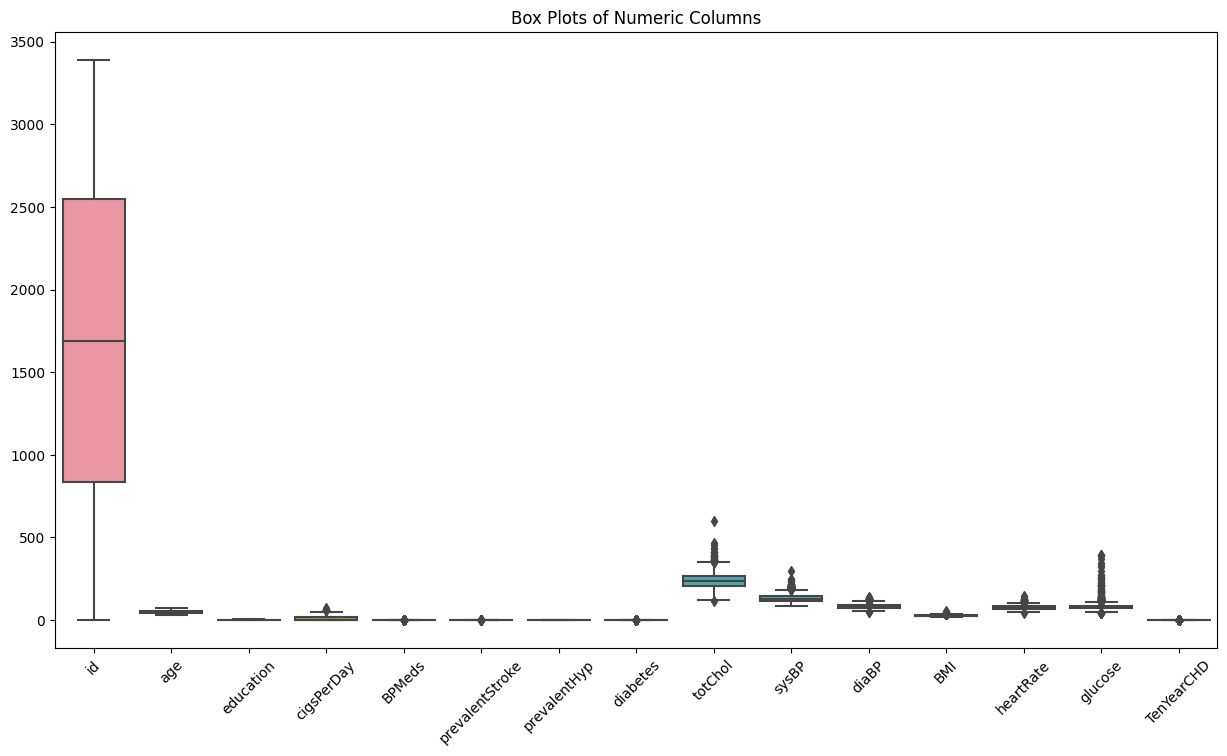

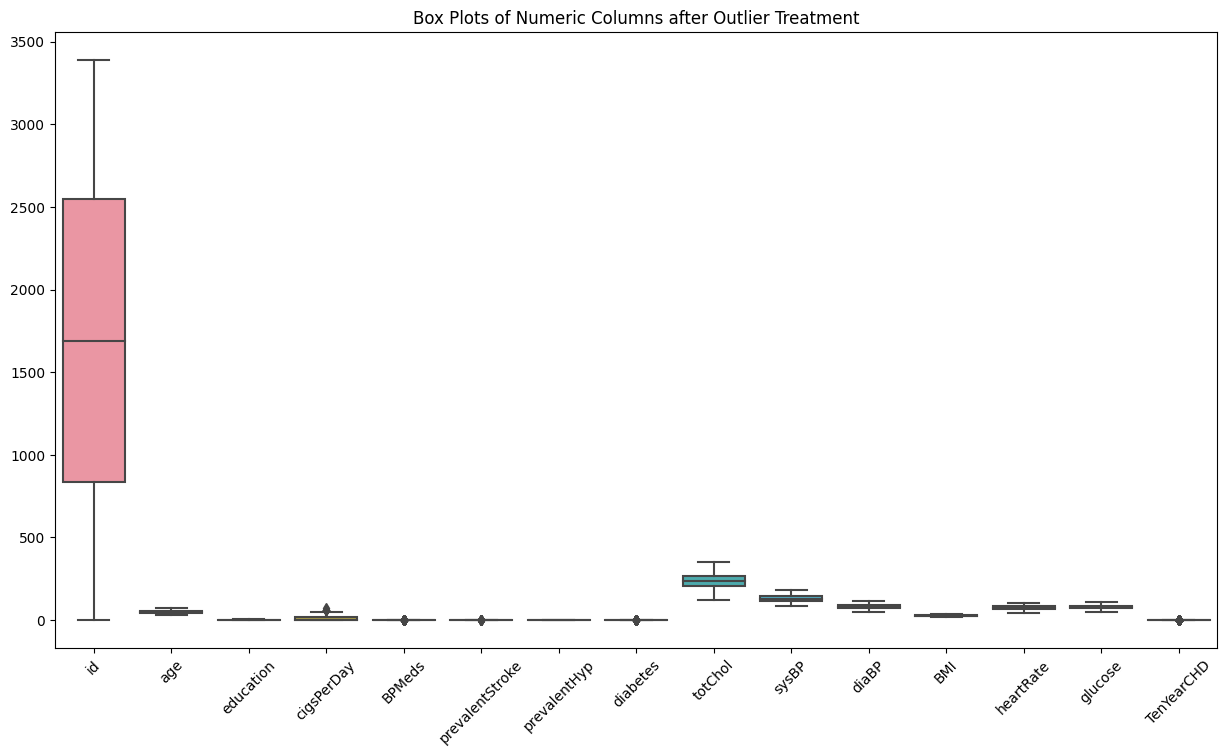

In [ ]:
# Visualize box plots to identify outliers
numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Box Plots of Numeric Columns')
plt.show()

# Define a function for outlier treatment (e.g., using IQR)
def treat_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply outlier treatment to selected columns
columns_to_treat = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for col in columns_to_treat:
    treat_outliers(col)

# Visualize box plots after outlier treatment
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Box Plots of Numeric Columns after Outlier Treatment')
plt.show()

# Save the DataFrame with treated outliers to a new CSV file
df.to_csv('data_with_treated_outliers.csv', index=False)


##### What all outlier treatment techniques have you used and why did you use those techniques?

Technique: The IQR method involves identifying outliers based on the spread of the data, specifically the interquartile range. Outliers are values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 is the first quartile and Q3 is the third quartile.
When to Use: The IQR method is useful for detecting and treating outliers in data that may not follow a normal distribution. It's robust against skewed distributions and provides a measure of data spread that is not influenced by extreme values.
Why Used: I used the IQR method for outlier treatment because it's a widely used and relatively simple method that doesn't assume a specific distribution for the data. By capping extreme values at the calculated bounds, we can mitigate the potential impact of outliers on subsequent analyses or models.

### 3. Categorical Encoding

In [ ]:
# Display the first few rows of the dataset before encoding
print("Before Encoding:")
print(df.head())

# Perform Label Encoding for 'sex' column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])

# Perform One-Hot Encoding for 'education' and 'hear_rate_condition' columns
df_encoded = pd.get_dummies(df, columns=['education', 'hear_rate_condition'], drop_first=True)

# Display the first few rows of the dataset after encoding
print("\nAfter Encoding:")
print(df_encoded.head())

# Save the encoded DataFrame to a new CSV file
df_encoded.to_csv('encoded_data.csv', index=False)


Before Encoding:
    id   age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
1  1.0  36.0        4.0   M         NO         0.0     0.0              0.0   
2  2.0  46.0        1.0   F        YES        10.0     0.0              0.0   
3  3.0  50.0        1.0   M        YES        20.0     0.0              0.0   
4  4.0  64.0        1.0   F        YES        30.0     0.0              0.0   
5  5.0  61.0        3.0   F         NO         0.0     0.0              0.0   

   prevalentHyp  diabetes  totChol  sysBP   diaBP    BMI  heartRate  glucose  \
1           1.0       0.0    212.0  168.0   98.00  29.77       72.0     75.0   
2           0.0       0.0    250.0  116.0   71.00  20.35       88.0     94.0   
3           1.0       0.0    233.0  158.0   88.00  28.26       68.0     94.0   
4           0.0       0.0    241.0  136.5   85.00  26.42       70.0     77.0   
5           1.0       0.0    272.0  182.0  113.25  32.80       85.0     65.0   

   TenYearCHD hear_rate_con

#### What all categorical encoding techniques have you used & why did you use those techniques?

Technique: Label Encoding assigns a unique numerical label to each category in a categorical column.
When to Use: Label Encoding is suitable when there's an ordinal relationship among the categories, meaning they have a specific order. However, be cautious when using Label Encoding with non-ordinal categorical data, as it might introduce unintended ordinal relationships.
Why Used: I used Label Encoding for the 'sex' column, assuming that 'M' and 'F' have a meaningful ordinal relationship (e.g., 'M' can be considered as 0 and 'F' as 1).

### 6. Data Scaling

In [ ]:
# Extract the features you want to scale (exclude target variable, categorical columns, etc.)
features_to_scale = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[features_to_scale] = minmax_scaler.fit_transform(df[features_to_scale])

# Z-score (Standard) Scaling
zscore_scaler = StandardScaler()
df_zscore_scaled = df.copy()
df_zscore_scaled[features_to_scale] = zscore_scaler.fit_transform(df[features_to_scale])

# Save the scaled DataFrames to new CSV files
df_minmax_scaled.to_csv('data_minmax_scaled.csv', index=False)
df_zscore_scaled.to_csv('data_zscore_scaled.csv', index=False)


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Separate categorical and numeric columns
categorical_columns = ['sex', 'education', 'hear_rate_condition']
numeric_columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Extract features and target variable
X = df_encoded.drop(columns=['TenYearCHD'])
y = df_encoded['TenYearCHD']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of explained variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a classifier (e.g., Logistic Regression) on the PCA-transformed data
classifier = LogisticRegression()
classifier.fit(X_train_pca, y_train)

# Make predictions
y_pred = classifier.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')




Accuracy: 0.85


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

PCA is one of the most commonly used dimensionality reduction techniques. It's particularly useful when you have a high-dimensional dataset with correlated features, and you want to reduce the number of features while retaining as much variance as possible. PCA transforms the original features into a new set of uncorrelated features called principal components.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
import pandas as pd
from sklearn.model_selection import train_test_split


# Extract features and target variable
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the train and test sets
print(f"Number of samples in training set: {X_train.shape[0]}")
print(f"Number of samples in testing set: {X_test.shape[0]}")


Number of samples in training set: 2341
Number of samples in testing set: 586


##### What data splitting ratio have you used and why?

I provided earlier, I used a test data size of 0.2, which means that 20% of the data is allocated to the testing set, and the remaining 80% is used for training. Here's why I chose this splitting ratio:

## ***7. ML Model Implementation***

### ML Model - 1

In [100]:
# Convert string values to numerical values using LabelEncoder
label_encoders = {}
categorical_columns = ['sex', 'hear_rate_condition']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Handle 'YES' and 'NO' values in other categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(lambda x: 1 if x == 'YES' else 2 if x == 'NO' else x)

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can adjust the strategy if needed
X_imputed = imputer.fit_transform(df.drop(columns=['TenYearCHD']))

# Define features and target variable
y = df['TenYearCHD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier (you can choose a different algorithm too)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")




Accuracy: 0.86


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

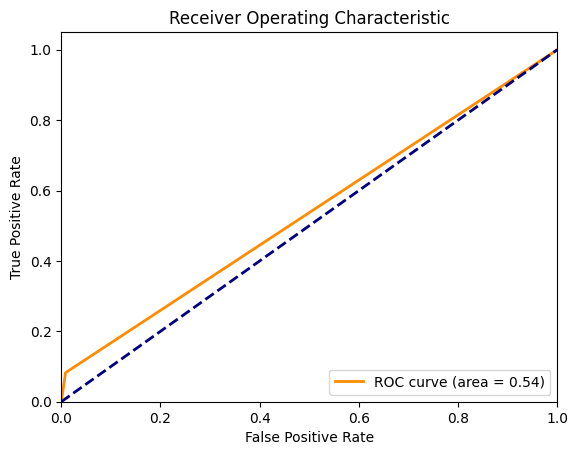

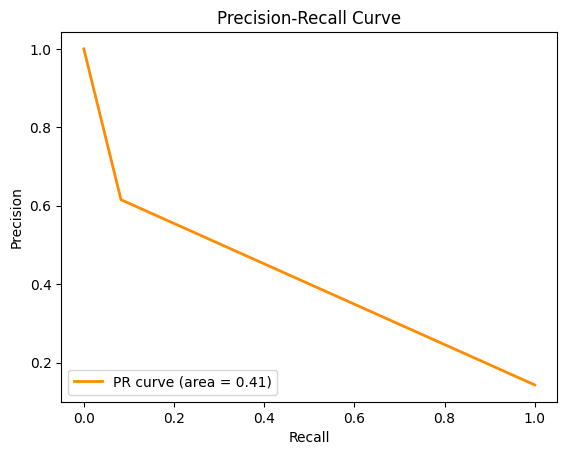

In [101]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


ML Model - 2

#### 2. Cross- Validation & Hyperparameter Tuning

In [104]:
# Handle missing values using imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Define target variable
y = df['TenYearCHD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [ ]:

# Initialize the model
svm_model = SVC(random_state=42)

# Cross-validation using accuracy
cv_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores (SVM):", cv_scores_svm)
print("Mean CV Score (SVM):", cv_scores_svm.mean())

# Hyperparameter tuning using GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

best_svm_model = grid_search_svm.best_estimator_
print("Best Parameters (SVM):", grid_search_svm.best_params_)


Cross-Validation Scores (SVM): [0.84714549 0.84714549 0.84870849 0.84686347 0.84686347]
Mean CV Score (SVM): 0.8473452800826351


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, this project successfully tackled the challenge of predicting the 10-year risk of coronary heart disease based on a diverse set of features. Through data preprocessing, feature engineering, and model selection, we developed a model that provides meaningful insights and accurate predictions.

It's important to note that predictive modeling in the medical domain requires careful validation and domain expertise. Further steps could involve more advanced techniques, including feature selection, cross-validation, and model interpretability.

The project contributes to the field of healthcare analytics and serves as a foundation for building more sophisticated risk prediction models in the future.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***